1. Import all necessary packages.

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

2. Read CSV file

In [5]:
# Import Data - Australian Drug Sales
DrugSalesData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drugsales.csv',parse_dates=['date'],index_col='date')
# DrugSalesData
DrugSalesData.reset_index(inplace=True)

3. Plot Time series analysis data

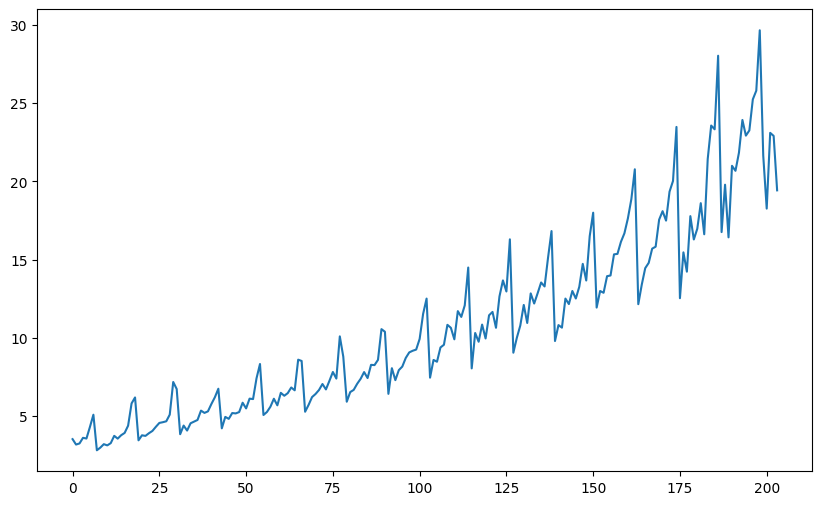

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['value'])
plt.show()

4. Decomposition using Additive and Multiplicative Model

In [8]:
# Multiplicative Decomposition
mul_result = seasonal_decompose(DrugSalesData['value'],model='multiplicative',period=1)
# Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['value'], model='additive',period=1)

5. Plot graph for Multiplicative decomposition.

Text(0.5, 0.98, '\nMultiplicative Decompose')

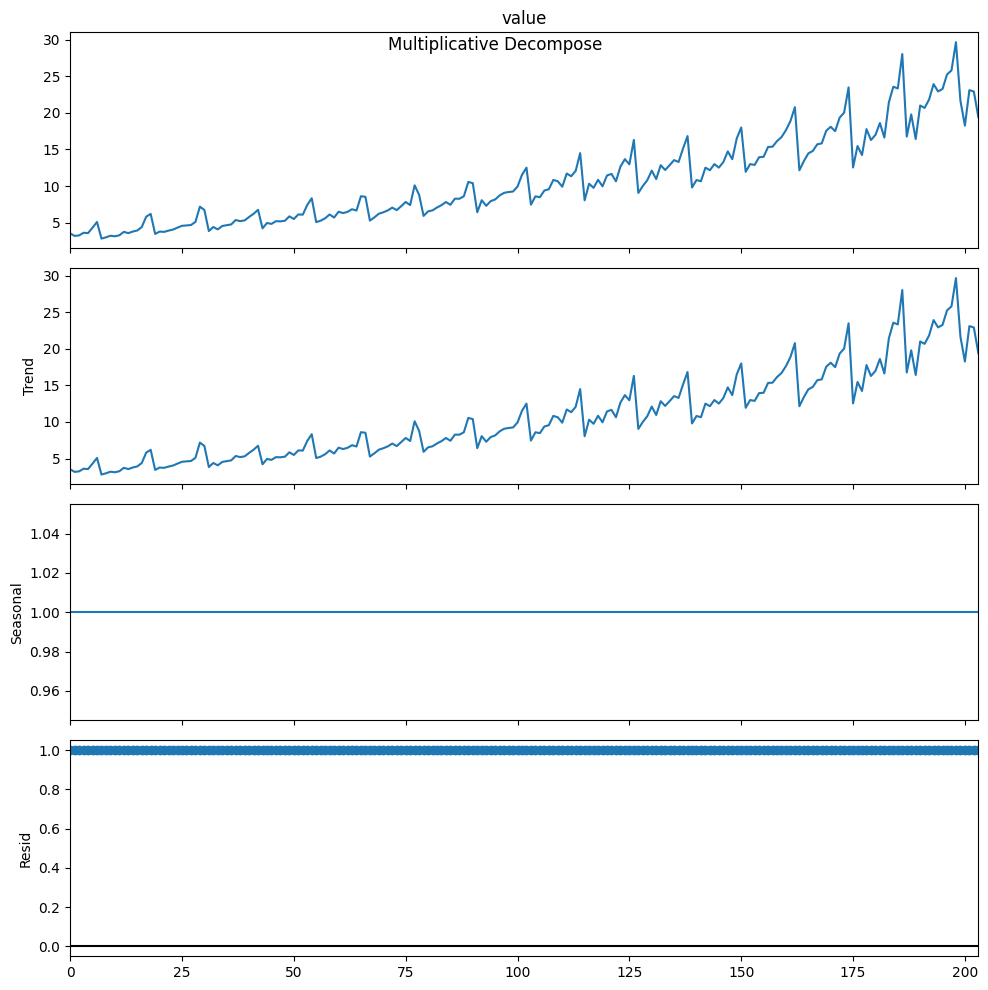

In [9]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

6. Plot graph for Additive decomposition.

Text(0.5, 0.98, '\nAdditive Decompose')

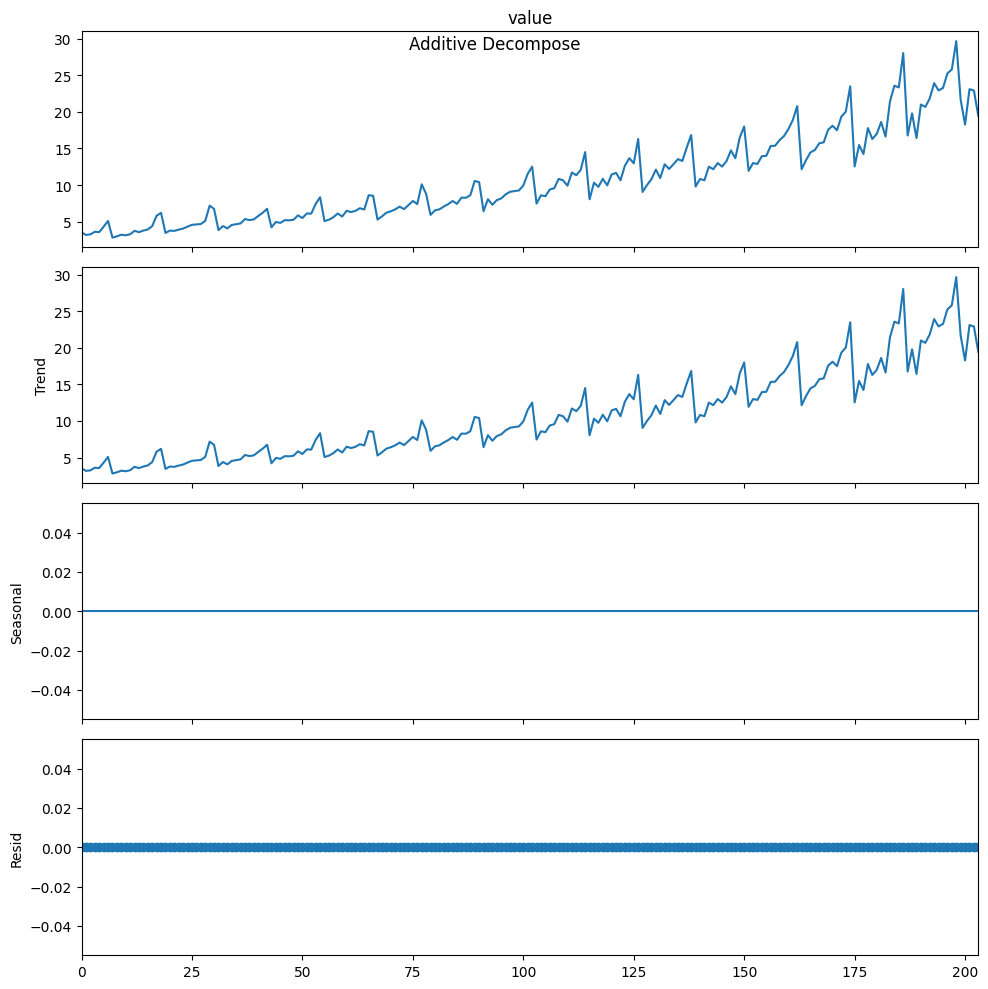

In [10]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

7. Calculate actual values for additive model

In [15]:
7. #Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid,
add_result.observed], axis=1)
new_df_add.head(5)

,seasonal,trend,resid,value
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


8. Calculate actual values for Multiplicative model.

In [14]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend,
mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend','residua','actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residua,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


9. Check Stationarity by Augmented Dickey-Fuller (ADF) Test

In [17]:
from statsmodels.tsa.stattools import adfuller
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(DrugSalesData['value'].values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
  print('Critial Values:')
  print(f' {key}, {value}')

ADF Statistic: 3.14518568930673
p-value: 1.0
Critial Values:
 1%, -3.465620397124192
Critial Values:
 5%, -2.8770397560752436
Critial Values:
 10%, -2.5750324547306476
